# PREDIKSI BIAYA PENGIRIMAN BARANG

**Business Understanding**

**Latar Belakang**

Biaya pengiriman merupakan komponen biaya yang sangat signifikan dan dapat sangat bervariasi tergantung pada beberapa faktor seperti berat barang, dimensi, jarak pengiriman, dan jenis layanan yang dipilih. Mengingat variasi ini, penting bagi perusahaan untuk dapat memperkirakan biaya pengiriman dengan lebih akurat guna memperkuat proses pengambilan keputusan dalam operasional sehari-hari.

**Tujuan**

Tujuan dari proyek ini adalah untuk memperkuat proses pengambilan keputusan dengan menyediakan estimasi biaya pengiriman yang lebih akurat. Estimasi ini diharapkan dapat memudahkan perusahaan dalam membuat keputusan yang berkaitan dengan alokasi kapasitas dan strategi pengiriman, serta mengoptimalkan harga jual produk dan meningkatkan kepuasan pelanggan.

**Analytic Approach**

Metodologi yang digunakan dalam proyek ini adalah sebagai berikut:

1. Business Understanding: Memahami masalah bisnis dan menentukan tujuan analitik.
2. Data Understanding: Mengumpulkan dan memahami data yang relevan.
3. Data Preparation: Menyiapkan data untuk analisis dengan mengatasi missing values dan melakukan encoding variabel kategorikal.
4. Modeling: Membangun model regresi linear untuk memprediksi biaya pengiriman.
5. Evaluation: Mengevaluasi kinerja model menggunakan metrik seperti MSE, RMSE, R², MAE, MAPE, dan Adjusted R².

**Data Requirements**

**Sumber Data**

Data yang digunakan dalam prediksi biaya pengiriman ini mencakup informasi berikut:
1. City: Kota pengiriman.
2. Ship Mode: Mode pengiriman.
3. Order Priority: Prioritas pesanan.
4. Product Container: Jenis kemasan produk.
5. Cost Price: Harga biaya barang.
6. Retail Price: Harga jual barang.
7. Order Quantity: Jumlah pesanan.
8. Total: Total setelah pengiriman.
9. Shipping Cost: Biaya pengiriman aktual.

**Persiapan Data**

Berikut adalah langkah-langkah persiapan data yang dilakukan dalam kode:

1. Mengonversi kolom mata uang menjadi numerik: Kolom seperti Cost Price, Retail Price, Profit Margin, Sub Total, Discount $, Order Total, Shipping Cost, dan Total dikonversi dari format string ke format numerik.
2. Menangani nilai yang hilang: Nilai yang hilang pada kolom numerik diisi dengan nilai rata-rata kolom tersebut.
3. Mengidentifikasi dan mengonversi kolom non-numerik: Kolom non-numerik diubah menjadi string, lalu dilakukan encoding menggunakan LabelEncoder.
4. Normalisasi data: Kolom fitur dinormalisasi menggunakan MinMaxScaler agar berada dalam rentang 0-1.


In [ ]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder

# Ignore all warnings
warnings.filterwarnings("ignore")

# Load data
df = pd.read_csv('data.csv')

In [ ]:
# Convert currency columns to numeric
currency_columns = ['Cost Price', 'Retail Price', 'Profit Margin', 'Sub Total', 'Discount $', 'Order Total', 'Shipping Cost', 'Total']
for col in currency_columns:
    df[col] = df[col].replace('[\$,]', '', regex=True).astype(float)

# Handling missing values for numeric columns only
numeric_columns = df.select_dtypes(include=[np.number]).columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

# Identify and convert non-numeric columns
non_numeric_columns = df.select_dtypes(exclude=[np.number]).columns
df[non_numeric_columns] = df[non_numeric_columns].astype(str)

# Encode categorical variables
le = LabelEncoder()
for col in non_numeric_columns:
    df[col] = le.fit_transform(df[col])

# Confirm all columns are now numeric
print(df.dtypes)

Order No               int64
Order Date             int64
Customer Name          int64
Address                int64
City                   int64
State                  int64
Customer Type          int64
Account Manager        int64
Order Priority         int64
Product Name           int64
Product Category       int64
Product Container      int64
Ship Mode              int64
Ship Date              int64
Cost Price           float64
Retail Price         float64
Profit Margin        float64
Order Quantity       float64
Sub Total            float64
Discount %             int64
Discount $           float64
Order Total          float64
Shipping Cost        float64
Total                float64
dtype: object


In [ ]:
# Exploratory Data Analysis (EDA)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Order No           5000 non-null   int64  
 1   Order Date         5000 non-null   int64  
 2   Customer Name      5000 non-null   int64  
 3   Address            5000 non-null   int64  
 4   City               5000 non-null   int64  
 5   State              5000 non-null   int64  
 6   Customer Type      5000 non-null   int64  
 7   Account Manager    5000 non-null   int64  
 8   Order Priority     5000 non-null   int64  
 9   Product Name       5000 non-null   int64  
 10  Product Category   5000 non-null   int64  
 11  Product Container  5000 non-null   int64  
 12  Ship Mode          5000 non-null   int64  
 13  Ship Date          5000 non-null   int64  
 14  Cost Price         5000 non-null   float64
 15  Retail Price       5000 non-null   float64
 16  Profit Margin      5000 

In [ ]:
# Exploratory Data Analysis (EDA)
df.head()

,Order No,Order Date,Customer Name,Address,City,State,Customer Type,Account Manager,Order Priority,Product Name,...,Cost Price,Retail Price,Profit Margin,Order Quantity,Sub Total,Discount %,Discount $,Order Total,Shipping Cost,Total
0,0,49,780,30,1,0,3,16,0,252,...,156.50,300.97,144.47,23.0,4533.52,3,194.83,4757.22,7.18,4291.55
1,1,686,674,99,1,0,1,7,3,117,...,0.24,1.26,1.02,8.0,45.20,4,0.00,45.90,0.70,46.91
2,2,345,217,96,0,1,0,3,4,240,...,42.11,80.98,38.87,45.0,873.32,5,72.23,837.57,7.18,82.58
3,3,485,670,24,1,0,3,10,0,111,...,5.33,8.60,3.27,16.0,73.52,1,4.35,740.67,6.19,730.92
4,4,358,149,45,1,0,3,16,4,192,...,1.53,2.78,1.25,49.0,138.46,8,5.95,123.77,1.34,125.97


In [ ]:
# Exploratory Data Analysis (EDA)
df.describe()

,Order No,Order Date,Customer Name,Address,City,State,Customer Type,Account Manager,Order Priority,Product Name,...,Cost Price,Retail Price,Profit Margin,Order Quantity,Sub Total,Discount %,Discount $,Order Total,Shipping Cost,Total
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,...,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.0000,5000.000000,5000.000000,5000.00000
mean,723.326200,447.345800,394.702000,104.669800,0.716800,0.283200,1.510200,8.834200,2.065600,130.661400,...,20.394022,38.287266,17.99606,26.483097,783.586770,4.940600,49.4329,761.799970,5.464932,746.30728
std,411.781398,257.297072,225.771539,58.272483,0.450598,0.450598,1.013953,5.825968,1.417779,73.240942,...,57.137204,99.136522,44.70212,14.390423,2444.089326,3.193981,237.2795,2361.537263,7.979031,2283.42573
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.240000,1.140000,0.36000,1.000000,1.880000,0.000000,0.0000,1.710000,0.490000,2.85000
25%,352.000000,227.000000,197.000000,52.000000,0.000000,0.000000,1.000000,3.000000,1.000000,68.000000,...,1.840000,2.940000,1.32000,13.000000,65.100000,2.000000,2.2375,62.190000,1.010000,63.46000
50%,734.000000,449.000000,394.000000,108.000000,1.000000,0.000000,1.000000,8.000000,2.000000,122.000000,...,3.500000,5.740000,2.33000,27.000000,144.000000,5.000000,5.6400,136.010000,2.850000,137.50500
75%,1100.250000,676.000000,596.000000,158.000000,1.000000,1.000000,2.000000,16.000000,3.000000,203.000000,...,8.845000,19.980000,8.50000,39.000000,431.000000,8.000000,18.8600,410.477500,6.500000,407.09750
max,1434.000000,880.000000,788.000000,195.000000,1.000000,1.000000,3.000000,18.000000,4.000000,256.000000,...,377.990000,599.990000,430.18000,50.000000,31699.820000,10.000000,6094.9000,28299.510000,69.300000,26725.06000


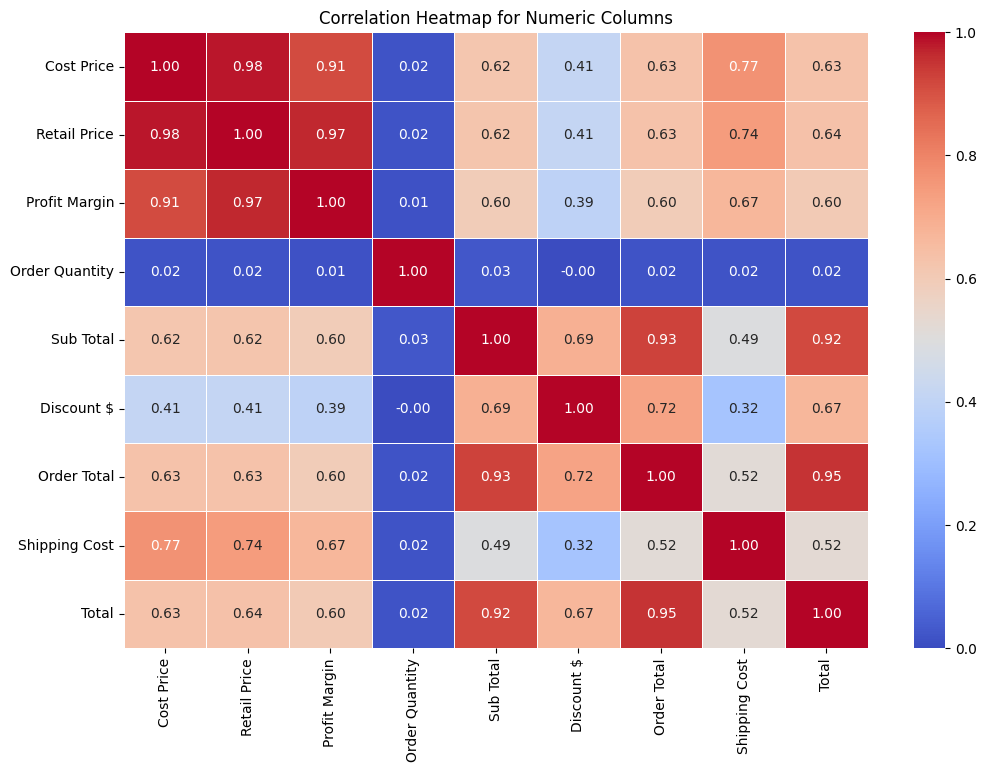

In [ ]:
# Correlation heatmap for numeric columns
correlation_matrix = df[numeric_columns].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap for Numeric Columns")
plt.show()

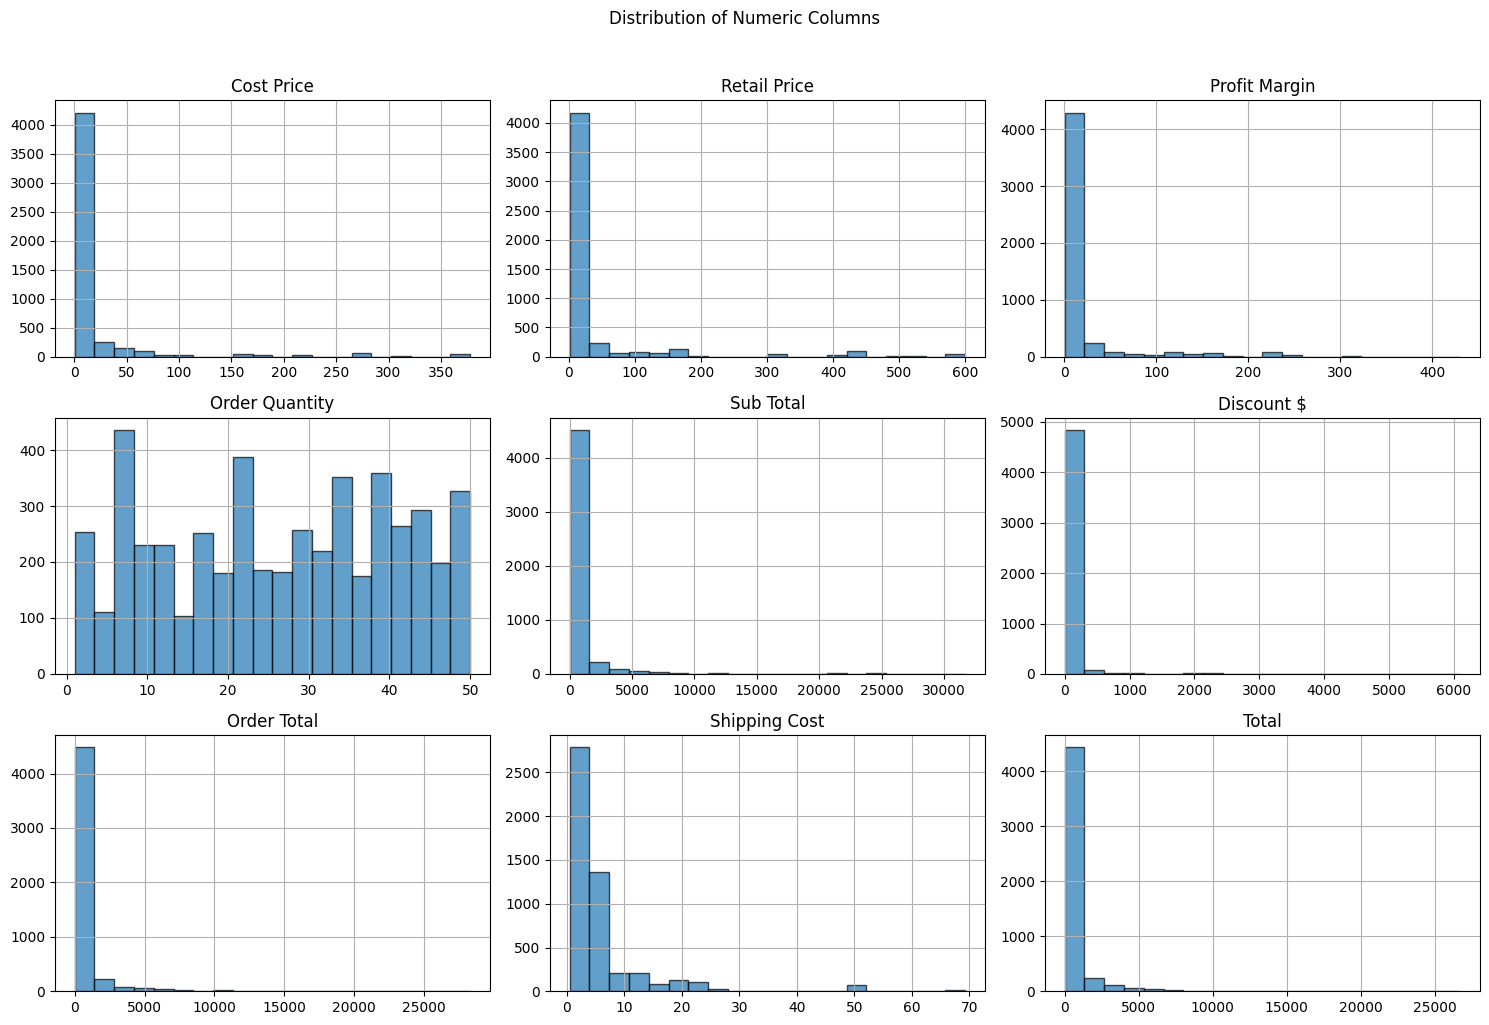

In [ ]:
# Histograms for numeric columns
df[numeric_columns].hist(figsize=(15, 10), bins=20, edgecolor='k', alpha=0.7)
plt.suptitle("Distribution of Numeric Columns", y=1.02)
plt.tight_layout()
plt.show()

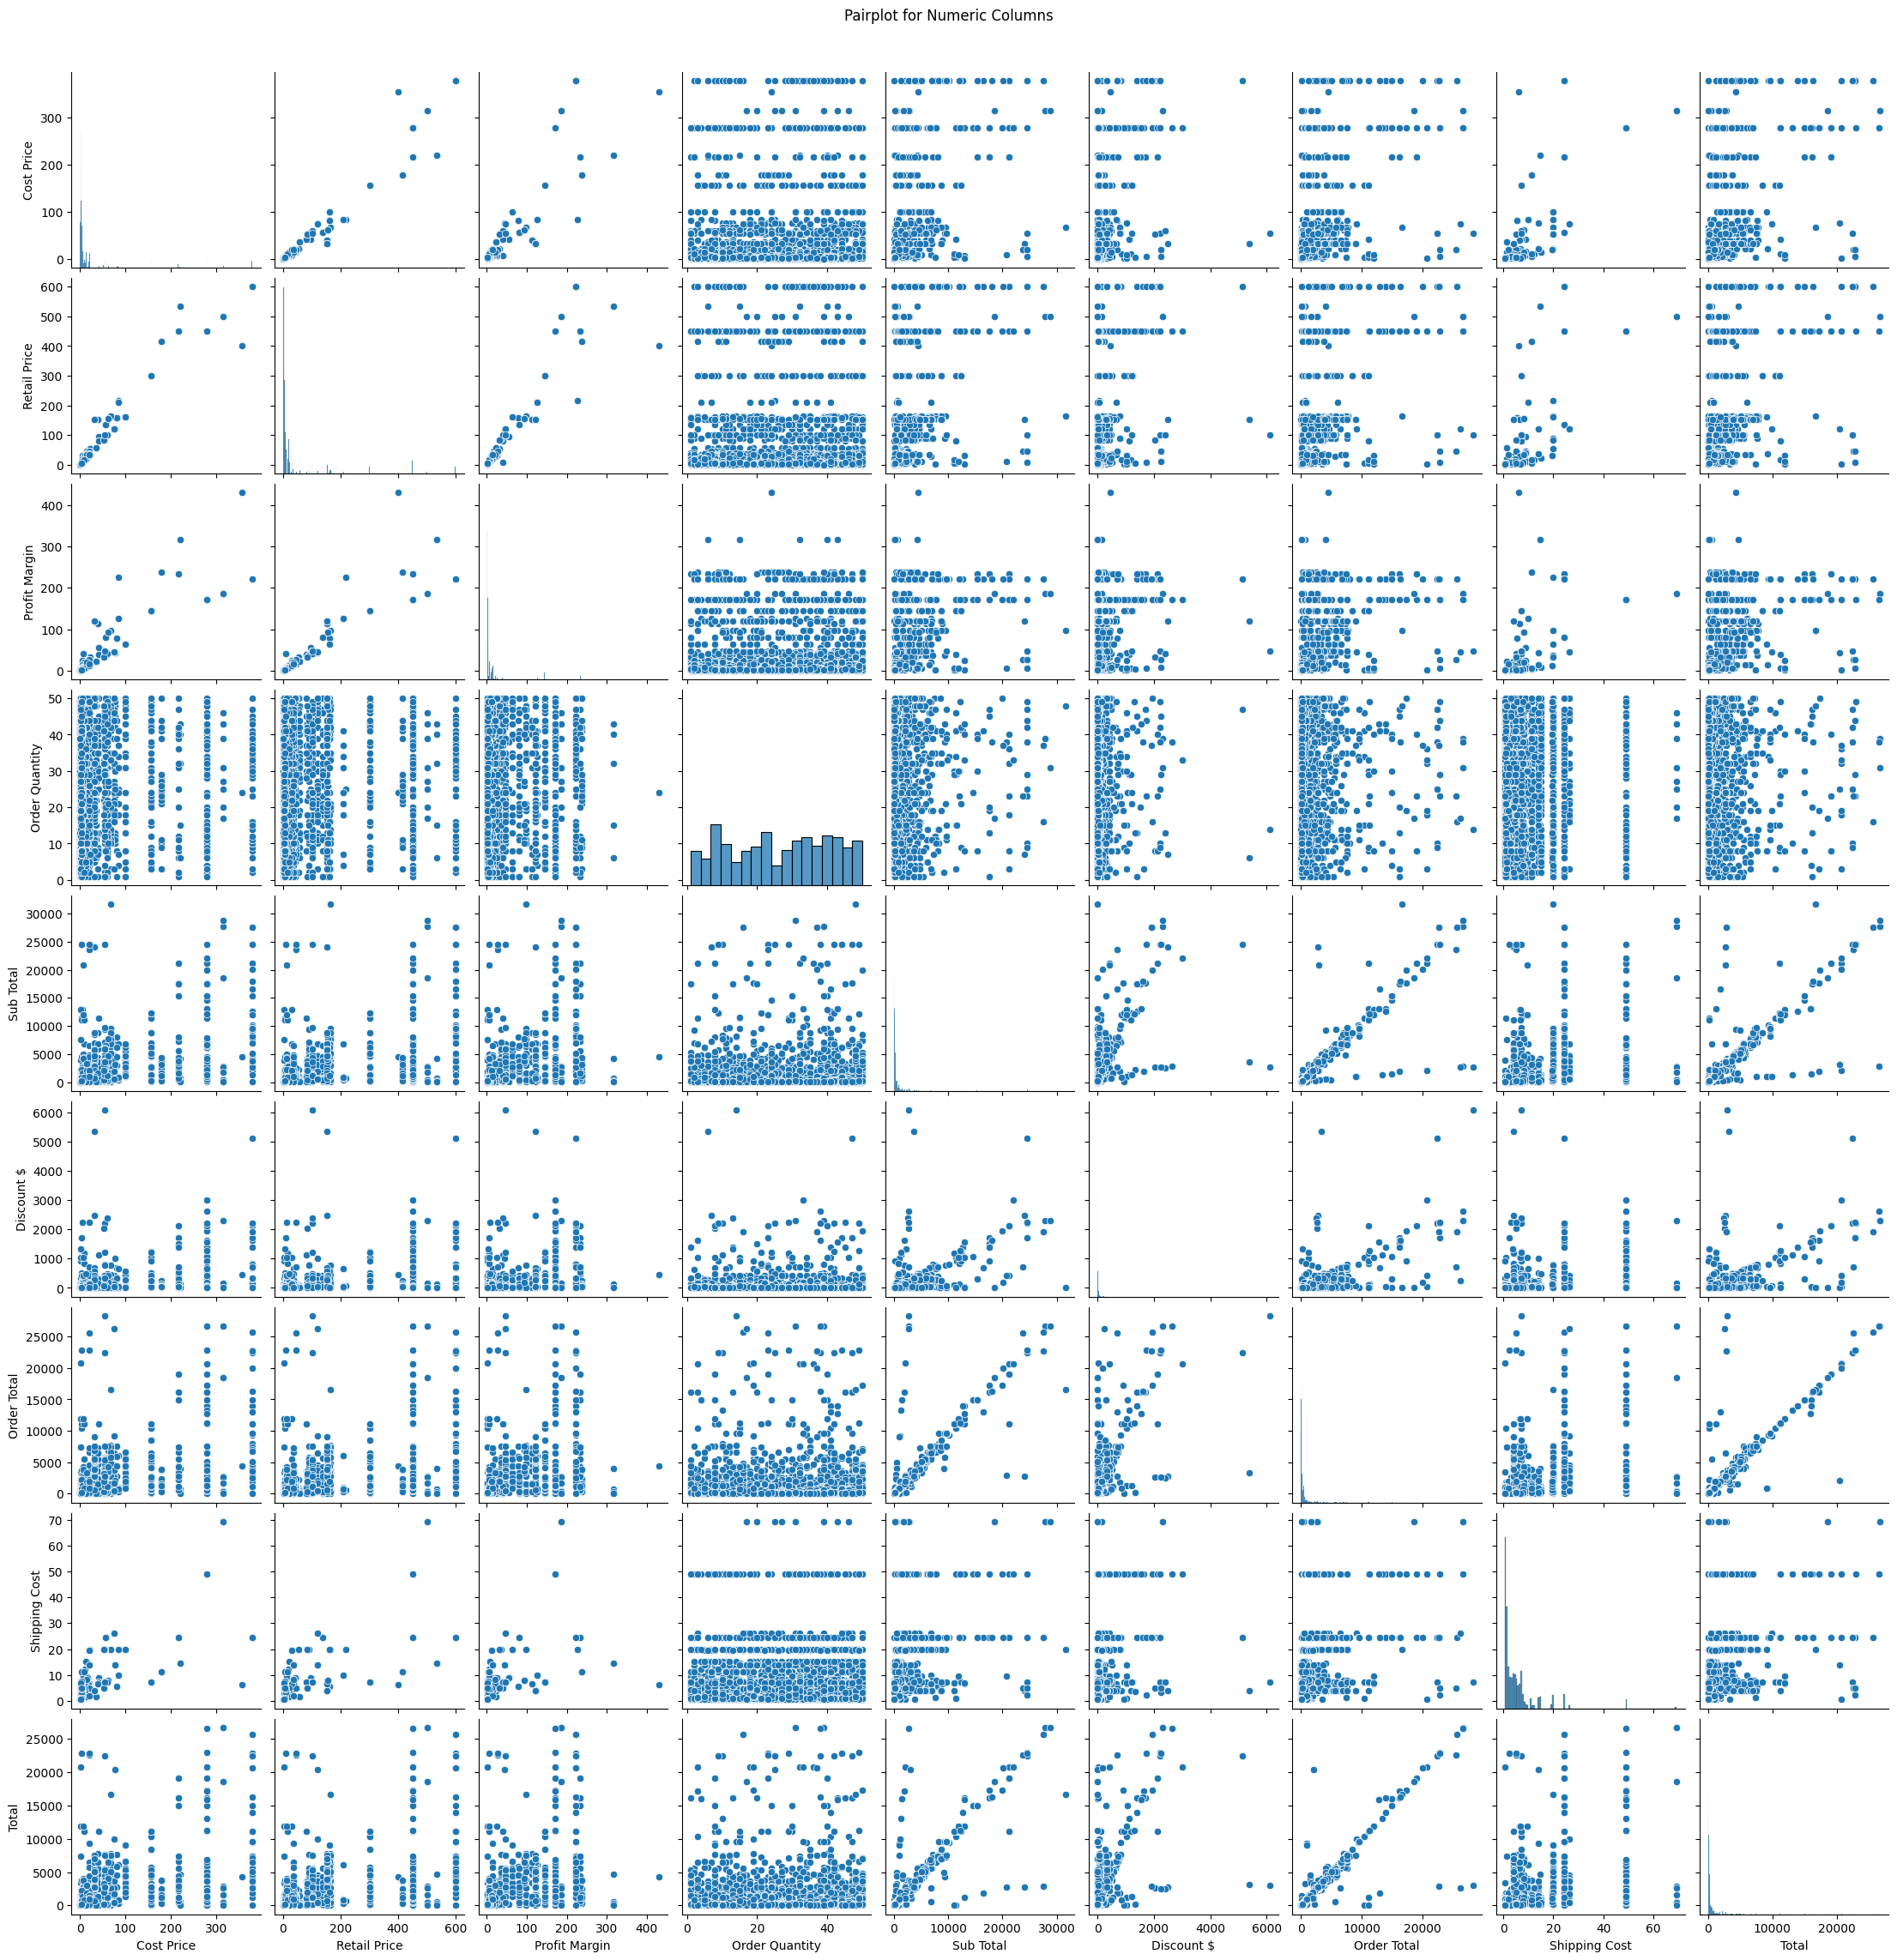

In [ ]:
# Pairplot for numeric columns
sns.pairplot(df[numeric_columns])
plt.suptitle("Pairplot for Numeric Columns", y=1.02)
plt.show()

In [ ]:
# Data normalization to range (0-1) using MinMaxScaler
scaler = MinMaxScaler()
feature_columns = ['City', 'Ship Mode', 'Order Priority', 'Product Container', 'Cost Price', 'Retail Price', 'Order Quantity', 'Total']
df[feature_columns] = scaler.fit_transform(df[feature_columns])
df[feature_columns]

,City,Ship Mode,Order Priority,Product Container,Cost Price,Retail Price,Order Quantity,Total
0,1.0,1.0,0.00,0.6,0.413660,0.500676,0.448980,0.160492
1,1.0,1.0,0.75,0.8,0.000000,0.000200,0.142857,0.001649
2,0.0,1.0,1.00,0.6,0.110841,0.133322,0.897959,0.002984
3,1.0,1.0,0.00,1.0,0.013475,0.012457,0.306122,0.027246
4,1.0,0.5,1.00,1.0,0.003415,0.002739,0.979592,0.004607
...,...,...,...,...,...,...,...,...
4995,1.0,1.0,0.00,0.8,0.007253,0.007848,0.693878,0.003681
4996,1.0,1.0,1.00,0.8,0.051860,0.049829,0.979592,0.039282
4997,1.0,1.0,0.50,0.8,0.052786,0.057226,0.367347,0.034360
4998,1.0,1.0,1.00,1.0,0.003574,0.002455,0.448980,0.002298


In [ ]:
# Define features and target variable
X = df[feature_columns]
y = df['Shipping Cost']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error

# Function to calculate Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Function to calculate Adjusted R-squared
def adjusted_r2_score(r2, X):
    n = len(X)
    p = X.shape[1]
    return 1 - (1 - r2) * (n - 1) / (n - p - 1)

In [ ]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
adjusted_r2 = adjusted_r2_score(r2, X_test)

In [ ]:
# Print evaluation metrics
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Absolute Percentage Error (MAPE): {mape}%')
print(f'Adjusted R-squared: {adjusted_r2}')

Mean Squared Error: 26.791998535719404
Root Mean Squared Error: 5.176098775691921
R-squared: 0.5977218815249914
Mean Absolute Error (MAE): 3.3842282850711616
Mean Absolute Percentage Error (MAPE): 144.98007568886482%
Adjusted R-squared: 0.5944744295090478


In [ ]:
# Create DataFrame to compare actual and predicted shipping costs
comparison_df = pd.DataFrame(X_test, columns=feature_columns)
comparison_df['Actual Shipping Cost'] = y_test.values
comparison_df['Predicted Shipping Cost'] = y_pred

# Display the comparison table
print(comparison_df.head())

      City  Ship Mode  Order Priority  Product Container  Cost Price  \
1501   1.0        1.0            0.50                1.0    0.005983   
2586   1.0        1.0            0.00                0.6    0.009027   
2653   1.0        1.0            0.50                0.6    0.009027   
1055   1.0        1.0            0.00                0.6    0.005347   
705    1.0        1.0            0.25                0.6    0.005983   

      Retail Price  Order Quantity     Total  Actual Shipping Cost  \
1501      0.007581        0.408163  0.004988                  3.60   
2586      0.008082        0.836735  0.003063                  1.49   
2653      0.008082        0.367347  0.004476                  1.49   
1055      0.004074        0.102041  0.005376                  5.47   
705       0.007581        0.469388  0.009202                  3.60   

      Predicted Shipping Cost  
1501                 3.448720  
2586                 3.777052  
2653                 3.586363  
1055              

In [ ]:
# Save the comparison table to a CSV file
comparison_df.to_csv('shipping_cost_comparison.csv', index=False)

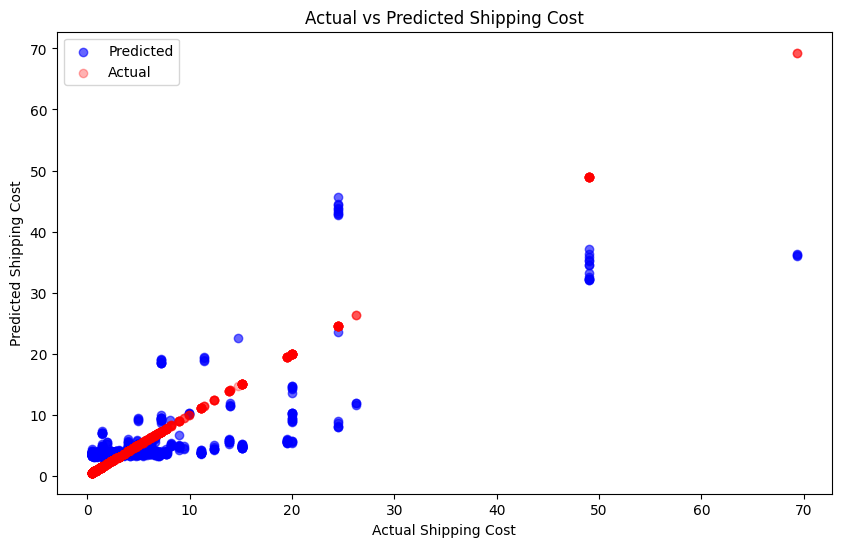

In [ ]:
# Visualize the comparison with different colors
plt.figure(figsize=(10, 6))
plt.scatter(comparison_df['Actual Shipping Cost'], comparison_df['Predicted Shipping Cost'], alpha=0.6, label='Predicted', color='blue')
plt.scatter(comparison_df['Actual Shipping Cost'], comparison_df['Actual Shipping Cost'], alpha=0.3, label='Actual', color='red')
plt.xlabel('Actual Shipping Cost')
plt.ylabel('Predicted Shipping Cost')
plt.title('Actual vs Predicted Shipping Cost')
plt.legend()
plt.show()

---
**HASIL EVALUASI MODEL:**

1. Mean Squared Error (MSE):
    * Definisi: Mean Squared Error (MSE) adalah rata-rata kuadrat perbedaan antara nilai aktual dan nilai prediksi. MSE mengukur seberapa jauh prediksi model dari nilai sebenarnya dengan memberikan penalti yang lebih besar untuk kesalahan yang lebih besar karena mengkuadratkan selisih.
    * Hasil: MSE = 26.791998535719404
    * Interpretasi:
      - Rata-rata Kuadrat Kesalahan: Nilai MSE sebesar 26.79 menunjukkan bahwa rata-rata kuadrat perbedaan antara nilai prediksi biaya pengiriman dan nilai aktual adalah sekitar 26.79. Ini berarti bahwa kesalahan prediksi model memiliki variabilitas yang cukup besar.
      - Penalti untuk Kesalahan Besar: Karena MSE mengkuadratkan perbedaan, kesalahan yang lebih besar akan mendapatkan penalti yang lebih besar. Ini membantu dalam mengidentifikasi model yang menghasilkan kesalahan besar dan perlu diperbaiki.
      - Evaluasi Performa Model: MSE memberikan indikasi umum tentang akurasi model. Nilai MSE yang lebih rendah menunjukkan bahwa model memiliki performa yang lebih baik dalam memprediksi nilai target.

2. Root Mean Squared Error (RMSE):
    * Definisi: Root Mean Squared Error (RMSE) adalah akar kuadrat dari Mean Squared Error (MSE). RMSE memberikan ukuran rata-rata besar kesalahan dalam satuan yang sama dengan variabel target, dalam hal ini, biaya pengiriman.
    * Hasil: RMSE = 5.176098775691921
    * Interpretasi:
      - Kesalahan dalam Satuan yang Sama: RMSE memiliki satuan yang sama dengan variabel target, yaitu biaya pengiriman. Ini membuat RMSE lebih mudah diinterpretasikan dan memberikan gambaran yang jelas tentang seberapa besar kesalahan prediksi dalam konteks yang kita pahami.
      - Rata-rata Besar Kesalahan: Nilai RMSE sebesar 5.17 menunjukkan bahwa rata-rata kesalahan prediksi biaya pengiriman oleh model adalah sekitar 5.17 unit biaya pengiriman. Artinya, prediksi model cenderung meleset sekitar 5.17 unit dari nilai aktualnya, secara rata-rata.
      - Evaluasi Performa Model: Dalam konteks evaluasi performa model, RMSE digunakan untuk mengukur seberapa akurat model dalam membuat prediksi. RMSE yang lebih rendah menunjukkan model yang lebih baik karena kesalahan prediksi rata-rata lebih kecil.

3. R-squared (R²):
    * Definisi: R-squared (R²) adalah proporsi variansi dalam variabel dependen (biaya pengiriman) yang bisa dijelaskan oleh variabel independen (fitur-fitur yang digunakan dalam model).
    * Hasil: R² = 0.5977218815249914
    * Interpretasi:
      - Proporsi Variansi yang Dijelaskan: Nilai R² sebesar 0.59 menunjukkan bahwa sekitar 59.09% variabilitas dalam biaya pengiriman dapat dijelaskan oleh fitur-fitur dalam model. Ini berarti model mampu menjelaskan lebih dari setengah variabilitas yang ada dalam data target.
      - Evaluasi Kecocokan Model: Nilai R² yang lebih tinggi (mendekati 1) menunjukkan bahwa model memiliki kecocokan yang baik dengan data. Sebaliknya, nilai R² yang rendah (mendekati 0) menunjukkan bahwa model kurang mampu menjelaskan variabilitas data.
      - Pemahaman terhadap Variabel Dependen: R² membantu dalam memahami seberapa baik model menjelaskan hubungan antara variabel independen dan dependen. Nilai R² sebesar 0.59 menunjukkan bahwa model cukup baik dalam memprediksi biaya pengiriman, meskipun masih ada 40.91% variabilitas yang tidak dijelaskan oleh model, yang mungkin disebabkan oleh faktor-faktor lain atau kesalahan acak.

4. Mean Absolute Error (MAE):
    * Definisi: Mean Absolute Error (MAE) adalah rata-rata dari kesalahan absolut antara nilai aktual dan nilai prediksi. MAE mengukur seberapa besar kesalahan prediksi model tanpa memperhitungkan arah kesalahan (positif atau negatif).
    * Hasil: MAE = 3.3842282850711616
    * Interpretasi:
      - Rata-rata Kesalahan Absolut: Nilai MAE sebesar 3.38 menunjukkan bahwa rata-rata kesalahan prediksi biaya pengiriman adalah sekitar 3.38 unit. Ini berarti bahwa prediksi model cenderung meleset sekitar 3.38 unit dari nilai aktualnya, secara rata-rata.
      - Evaluasi Performa Model: MAE memberikan gambaran langsung tentang seberapa besar kesalahan prediksi tanpa memberikan penalti lebih besar untuk kesalahan yang lebih besar, seperti yang dilakukan oleh MSE. Nilai MAE yang lebih rendah menunjukkan performa model yang lebih baik.

5. Mean Absolute Percentage Error (MAPE)
    * Definisi: Mean Absolute Percentage Error (MAPE) mengukur rata-rata kesalahan absolut dalam bentuk persentase dari nilai aktual. MAPE memberikan gambaran tentang besar kesalahan relatif terhadap nilai aktual.
    * Hasil: MAPE = 144.98007568886482%
    * Interpretasi:
      - Rata-rata Kesalahan Relatif: Nilai MAPE sebesar 144.98% menunjukkan bahwa rata-rata kesalahan prediksi adalah sekitar 144.98% dari nilai aktual biaya pengiriman. Ini berarti bahwa kesalahan prediksi sangat besar relatif terhadap ukuran nilai yang diprediksi.
      - Evaluasi Performa Model: MAPE yang tinggi (di atas 100%) menunjukkan bahwa model memiliki kesalahan prediksi yang signifikan dan kurang akurat. MAPE yang lebih rendah menunjukkan bahwa model lebih baik dalam memprediksi nilai dengan kesalahan yang lebih kecil relatif terhadap nilai aktual.

6. Adjusted R-squared (Adjusted R²)
    * Definisi: Adjusted R-squared mengukur proporsi variansi dalam variabel dependen (biaya pengiriman) yang bisa dijelaskan oleh variabel independen, dengan mempertimbangkan jumlah variabel independen dan ukuran sampel. Adjusted R² memberikan penalti untuk menambahkan variabel yang tidak signifikan ke dalam model.
    * Hasil: Adjusted R² = 0.5944744295090478
    * Interpretasi:
      - Proporsi Variansi yang Dijelaskan dengan Penyesuaian: Nilai Adjusted R² sebesar 0.59 menunjukkan bahwa model menjelaskan sekitar 59.44% dari variabilitas dalam biaya pengiriman, setelah mempertimbangkan jumlah variabel independen yang digunakan. Ini berarti bahwa model cukup baik dalam menjelaskan hubungan antara fitur-fitur dan biaya pengiriman.\
      - Evaluasi Kecocokan Model: Adjusted R² membantu mengidentifikasi apakah penambahan fitur baru benar-benar meningkatkan kemampuan model dalam menjelaskan variabilitas data atau hanya menambah kompleksitas tanpa manfaat yang signifikan. Nilai Adjusted R² yang lebih tinggi menunjukkan bahwa model lebih baik dalam menjelaskan variabilitas data.

- Kesimpulan Keseluruhan:

  * MSE: Nilai MSE memberikan gambaran umum tentang rata-rata besar kesalahan prediksi, dengan penalti lebih besar untuk kesalahan yang lebih besar. Nilai MSE sebesar 26.79 menunjukkan variabilitas kesalahan yang cukup besar.
  * RMSE: Nilai RMSE yang lebih mudah diinterpretasikan menunjukkan bahwa rata-rata kesalahan prediksi adalah sekitar 5.17 unit biaya pengiriman. Ini memberikan pandangan yang jelas tentang besar kesalahan dalam satuan yang sama dengan data asli.
  * R²: Nilai R² sebesar 0.59 menunjukkan bahwa model mampu menjelaskan sekitar 59.09% variabilitas dalam biaya pengiriman, yang menunjukkan performa model yang cukup baik namun masih ada ruang untuk perbaikan.
  * MAE: Memberikan gambaran langsung tentang seberapa besar kesalahan prediksi rata-rata tanpa memperhitungkan arah kesalahan. Nilai MAE sebesar 3.38 menunjukkan kesalahan prediksi rata-rata sekitar 3.38 unit biaya pengiriman.
  * MAPE: Memberikan pandangan tentang besar kesalahan relatif terhadap nilai aktual dalam bentuk persentase. Nilai MAPE yang tinggi (144.98%) menunjukkan bahwa model memiliki kesalahan prediksi yang sangat besar relatif terhadap nilai aktual.
  * Adjusted R²: Memberikan evaluasi yang lebih realistis tentang kecocokan model dengan mempertimbangkan jumlah variabel independen yang digunakan. Nilai Adjusted R² sebesar 0.59 menunjukkan bahwa model cukup baik dalam menjelaskan variabilitas data, meskipun masih ada ruang untuk perbaikan.

  Dengan menggunakan metode evaluasi ini, kita dapat memperoleh gambaran yang lebih lengkap dan akurat tentang performa model regresi linier yang telah dibuat, serta mengidentifikasi area yang memerlukan perbaikan lebih lanjut.

---



# PENJELASAN CODE

### Importing Libraries

```python
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
```

- `pandas`: Untuk manipulasi dan analisis data.
- `numpy`: Untuk operasi numerik.
- `warnings`: Untuk mengelola peringatan.
- `matplotlib.pyplot`: Untuk membuat plot dan visualisasi.
- `seaborn`: Untuk membuat visualisasi statistik yang lebih menarik.
- `sklearn.model_selection.train_test_split`: Untuk membagi data menjadi set pelatihan dan pengujian.
- `sklearn.linear_model.LinearRegression`: Untuk membangun model regresi linear.
- `sklearn.metrics`: Untuk mengevaluasi kinerja model.
- `sklearn.preprocessing`: Untuk preprocessing data seperti standardisasi, normalisasi, dan encoding.

### Ignore Warnings

```python
warnings.filterwarnings("ignore")
```

- Mengabaikan semua peringatan agar output lebih bersih.

### Load Data

```python
df = pd.read_csv('data.csv')
```

- Memuat dataset dari file CSV.

### Convert Currency Columns to Numeric

```python
currency_columns = ['Cost Price', 'Retail Price', 'Profit Margin', 'Sub Total', 'Discount $', 'Order Total', 'Shipping Cost', 'Total']
for col in currency_columns:
    df[col] = df[col].replace('[\$,]', '', regex=True).astype(float)
```

- Menghapus tanda dolar (`$`) dari kolom yang berisi data mata uang dan mengonversinya menjadi tipe data `float`.

### Handling Missing Values

```python
numeric_columns = df.select_dtypes(include=[np.number]).columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())
```

- Mengisi nilai yang hilang pada kolom numerik dengan rata-rata kolom tersebut.

### Encode Categorical Variables

```python
non_numeric_columns = df.select_dtypes(exclude=[np.number]).columns
df[non_numeric_columns] = df[non_numeric_columns].astype(str)
le = LabelEncoder()
for col in non_numeric_columns:
    df[col] = le.fit_transform(df[col])
```

- Mengubah kolom non-numerik menjadi string dan menggunakan `LabelEncoder` untuk mengonversi variabel kategorikal menjadi angka.

### Confirm All Columns are Numeric

```python
print(df.dtypes)
```

- Memastikan semua kolom sudah berupa numerik.

### Exploratory Data Analysis (EDA)

```python
df.info()
df.head()
df.describe()
```

- `df.info()`: Menampilkan ringkasan informasi data seperti tipe data dan jumlah nilai yang hilang.
- `df.head()`: Menampilkan 5 baris pertama dari data.
- `df.describe()`: Menampilkan statistik deskriptif dari data numerik.

### Correlation Heatmap for Numeric Columns

```python
correlation_matrix = df[numeric_columns].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap for Numeric Columns")
plt.show()
```

- Membuat heatmap untuk melihat korelasi antara kolom numerik.

### Histograms for Numeric Columns

```python
df[numeric_columns].hist(figsize=(15, 10), bins=20, edgecolor='k', alpha=0.7)
plt.suptitle("Distribution of Numeric Columns", y=1.02)
plt.tight_layout()
plt.show()
```

- Membuat histogram untuk melihat distribusi kolom numerik.

### Pairplot for Numeric Columns

```python
sns.pairplot(df[numeric_columns])
plt.suptitle("Pairplot for Numeric Columns", y=1.02)
plt.show()
```

- Membuat pairplot untuk melihat hubungan antara kolom numerik.

### Data Normalization

```python
scaler = MinMaxScaler()
feature_columns = ['City', 'Ship Mode', 'Order Priority', 'Product Container', 'Cost Price', 'Retail Price', 'Order Quantity', 'Total']
df[feature_columns] = scaler.fit_transform(df[feature_columns])
df[feature_columns]
```

- Menormalkan kolom fitur menggunakan `MinMaxScaler` agar berada dalam rentang 0-1.

### Define Features and Target Variable

```python
X = df[feature_columns]
y = df['Shipping Cost']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
```

- Mendefinisikan variabel fitur (`X`) dan variabel target (`y`), kemudian membagi data menjadi set pelatihan dan pengujian dengan rasio 80:20.

### Build and Train Linear Regression Model

```python
model = LinearRegression()
model.fit(X_train, y_train)
```

- Membuat model regresi linear dan melatihnya menggunakan data pelatihan.

### Make Predictions on the Test Set

```python
y_pred = model.predict(X_test)
```

- Membuat prediksi biaya pengiriman pada set pengujian.

### Evaluation Metrics

```python
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def adjusted_r2_score(r2, X):
    n = len(X)
    p = X.shape[1]
    return 1 - (1 - r2) * (n - 1) / (n - p - 1)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
adjusted_r2 = adjusted_r2_score(r2, X_test)
```

- Menghitung berbagai metrik evaluasi model:
  - `MSE`: Mean Squared Error
  - `RMSE`: Root Mean Squared Error
  - `R²`: R-squared
  - `MAE`: Mean Absolute Error
  - `MAPE`: Mean Absolute Percentage Error
  - `Adjusted R²`: Adjusted R-squared

### Print Evaluation Metrics

```python
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Absolute Percentage Error (MAPE): {mape}%')
print(f'Adjusted R-squared: {adjusted_r2}')
```

- Mencetak hasil metrik evaluasi.

### Create DataFrame to Compare Actual and Predicted Shipping Costs

```python
comparison_df = pd.DataFrame(X_test, columns=feature_columns)
comparison_df['Actual Shipping Cost'] = y_test.values
comparison_df['Predicted Shipping Cost'] = y_pred

print(comparison_df.head())
```

- Membuat DataFrame untuk membandingkan biaya pengiriman aktual dan prediksi.

### Save Comparison Table to CSV

```python
comparison_df.to_csv('shipping_cost_comparison.csv', index=False)
```

- Menyimpan tabel perbandingan ke file CSV.

### Visualize the Comparison

```python
plt.figure(figsize=(10, 6))
plt.scatter(comparison_df['Actual Shipping Cost'], comparison_df['Predicted Shipping Cost'], alpha=0.6, label='Predicted', color='blue')
plt.scatter(comparison_df['Actual Shipping Cost'], comparison_df['Actual Shipping Cost'], alpha=0.3, label='Actual', color='red')
plt.xlabel('Actual Shipping Cost')
plt.ylabel('Predicted Shipping Cost')
plt.title('Actual vs Predicted Shipping Cost')
plt.legend()
plt.show()
```

- Membuat visualisasi untuk membandingkan biaya pengiriman aktual dan prediksi.

---

### Hasil Evaluasi Model

Penjelasan dari setiap metrik evaluasi model diberikan dalam hasil evaluasi, menjelaskan arti dan interpretasi dari MSE, RMSE, R², MAE, MAPE, dan Adjusted R². Metrik ini membantu dalam menilai seberapa baik model dalam memprediksi biaya pengiriman dan mengidentifikasi area yang memerlukan perbaikan.

### Gambar 1: Correlation Heatmap for Numeric Columns

Heatmap korelasi menunjukkan hubungan antara kolom numerik dalam dataset. Warna menunjukkan kekuatan dan arah korelasi:
- Warna merah tua menunjukkan korelasi positif yang kuat (+1).
- Warna biru tua menunjukkan korelasi negatif yang kuat (-1).
- Warna lebih terang menunjukkan korelasi yang lebih lemah.

Contoh dari heatmap ini:
- "Cost Price" memiliki korelasi yang sangat kuat dengan "Retail Price" (0.98).
- "Order Total" memiliki korelasi yang kuat dengan "Total" (0.95).
- "Shipping Cost" memiliki korelasi sedang dengan "Order Total" (0.52).

### Gambar 2: Histograms for Numeric Columns

Histogram menunjukkan distribusi data untuk setiap kolom numerik:
- Sebagian besar kolom memiliki distribusi yang miring ke kanan, yang menunjukkan adanya beberapa nilai yang sangat tinggi dibandingkan dengan sebagian besar data.
- "Order Quantity" menunjukkan distribusi yang lebih merata dibandingkan dengan kolom lainnya.
- "Discount $" dan "Profit Margin" memiliki banyak nilai nol, yang menunjukkan bahwa diskon dan margin keuntungan seringkali tidak ada.

### Gambar 3: Pairplot for Numeric Columns

Pairplot menunjukkan hubungan antar kolom dalam bentuk scatter plot dan histogram di sepanjang diagonal:
- Scatter plot membantu mengidentifikasi hubungan linier atau non-linier antara dua variabel.
- Histogram di sepanjang diagonal menunjukkan distribusi masing-masing variabel individu.
- Contoh, ada hubungan linier yang kuat antara "Cost Price" dan "Retail Price", yang terlihat dari pola linear pada scatter plot.


### HASIL EVALUASI MODEL:
Gambar di atas adalah plot perbandingan antara biaya pengiriman aktual dan biaya pengiriman yang diprediksi oleh model regresi linear.

### Penjelasan Gambar:

1. **Sumbu X**: Menunjukkan biaya pengiriman aktual.
2. **Sumbu Y**: Menunjukkan biaya pengiriman yang diprediksi.
3. **Titik Biru (Predicted)**: Menunjukkan nilai prediksi biaya pengiriman oleh model.
4. **Titik Merah (Actual)**: Menunjukkan nilai biaya pengiriman aktual dari data.

### Interpretasi:

- **Diagonal Line (Ideal Prediction)**: Jika model prediksi sempurna, semua titik biru (prediksi) akan berada tepat pada garis diagonal (y = x), yang artinya nilai prediksi sama dengan nilai aktual.

- **Dispersion**:
  - Titik-titik yang jauh dari garis diagonal menunjukkan prediksi model yang tidak akurat.
  - Titik biru yang tersebar di luar garis merah menunjukkan variasi prediksi yang cukup besar, terutama untuk biaya pengiriman yang lebih tinggi (di atas 20). Ini mengindikasikan bahwa model kesulitan memprediksi biaya pengiriman yang lebih tinggi dengan akurat.

- **Outliers**:
  - Beberapa titik merah di sebelah kanan atas (biaya pengiriman aktual tinggi) tidak memiliki pasangan titik biru di dekatnya. Ini menunjukkan bahwa model tidak dapat memprediksi nilai tersebut dengan baik.
  - Ada beberapa prediksi (titik biru) di sekitar 60-70 yang tidak sesuai dengan nilai aktual, menunjukkan prediksi yang sangat meleset.